In [143]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Embedding, Flatten

In [144]:
df = pd.read_csv('imdb_master.csv',encoding='latin-1')

In [145]:
print(df.head())

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [146]:
df.label.value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

In [147]:
sentences = df['review'].values
y = df['label'].values

In [148]:
# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [149]:
# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [150]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [151]:
# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 7s 98us/step - loss: 0.8815 - acc: 0.5033 - val_loss: 0.8419 - val_acc: 0.5120
Epoch 2/5
75000/75000 [==============================] - 7s 96us/step - loss: 0.7888 - acc: 0.5807 - val_loss: 0.8389 - val_acc: 0.5170
Epoch 3/5
75000/75000 [==============================] - 7s 97us/step - loss: 0.6855 - acc: 0.6807 - val_loss: 0.8857 - val_acc: 0.5200
Epoch 4/5
75000/75000 [==============================] - 7s 97us/step - loss: 0.4977 - acc: 0.8147 - val_loss: 0.9744 - val_acc: 0.5148
Epoch 5/5
75000/75000 [==============================] - 7s 98us/step - loss: 0.2906 - acc: 0.9237 - val_loss: 1.0686 - val_acc: 0.5058


In [152]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

25000/25000 [==============================] - 1s 59us/step
Evaluation result on Test Data : Loss = 1.068642297935486, accuracy = 0.5058000087738037


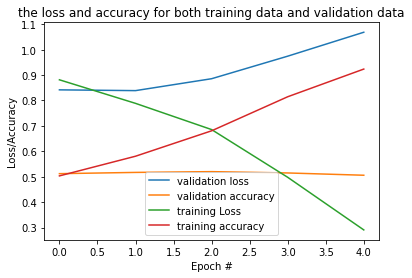

In [153]:
# plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 5), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 5), history.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 5), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 5), history.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [154]:
predict_classes = model.predict_classes(X_test[[10],:])
print(predict_classes[0])
print(y_test[10])

0
0


In [156]:
predict_classes = model.predict_classes(X_test[[5],:])
print(predict_classes[0])
print(y_test[5])

2
2


In [157]:
#print(input_dim)
model2 = Sequential()
model2.add(Embedding(2000, 50, input_length=2000))
model2.add(Flatten())
model2.add(layers.Dense(300,input_dim=2000, activation='relu'))
model2.add(layers.Dense(3,activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

history2=model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 385s 5ms/step - loss: 0.9651 - acc: 0.4958 - val_loss: 0.8680 - val_acc: 0.5058
Epoch 2/5
75000/75000 [==============================] - 384s 5ms/step - loss: 0.8368 - acc: 0.5271 - val_loss: 0.8415 - val_acc: 0.5121
Epoch 3/5
75000/75000 [==============================] - 383s 5ms/step - loss: 0.8105 - acc: 0.5493 - val_loss: 0.8386 - val_acc: 0.5098
Epoch 4/5
75000/75000 [==============================] - 383s 5ms/step - loss: 0.7915 - acc: 0.5688 - val_loss: 0.8402 - val_acc: 0.5180
Epoch 5/5
75000/75000 [==============================] - 382s 5ms/step - loss: 0.7702 - acc: 0.5857 - val_loss: 0.8463 - val_acc: 0.5187


In [158]:
[test_loss, test_acc] = model2.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

25000/25000 [==============================] - 42s 2ms/step
Evaluation result on Test Data : Loss = 0.8463134665679931, accuracy = 0.5186799764633179


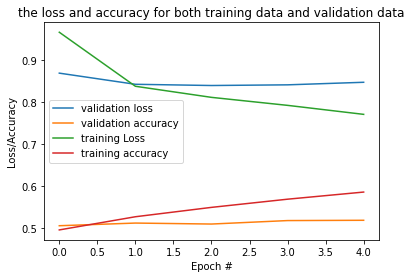

In [159]:
plt.figure()
plt.plot(np.arange(0, 5), history2.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 5), history2.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 5), history2.history["loss"], label="training Loss")
plt.plot(np.arange(0, 5), history2.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [160]:
predict_classes2 = model2.predict_classes(X_test[[10],:])
print(predict_classes2[0])
print(y_test[10])

0
0
